**Importing all requiste library**

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

**Creating Dataframe**

In [216]:
df=pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')

**Data Analysis and Cleaning**

In [217]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [218]:
df.isna().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [219]:
df.duplicated().sum()

np.int64(0)

In [220]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


**Creating new datframe in order to drop columns which are string and not required**

In [221]:
df_new = df.drop(columns=['customer name', 'customer e-mail', 'country'])

**Saving relevant features of data in a column and converting numpy into dataframe**

In [223]:
original_cols_for_df_new = df.drop(columns=['customer name', 'customer e-mail', 'country']).columns
df_processed = pd.DataFrame(df_new, columns=original_cols_for_df_new)
print ("Columns in new dataset- \n" , original_cols_for_df_new)
df_processed.describe()

Columns in new dataset- 
 Index(['gender', 'age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


**Defining X and Y for split data and assigning features (columns) to them**

In [224]:
X = df_processed.drop('car purchase amount', axis=1)
y = df_processed['car purchase amount']
X.describe()

,gender,age,annual Salary,credit card debt,net worth
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340
min,0.000000,20.000000,20000.000000,100.000000,20000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000


**Reviewing Train and Test Data to ensiure they have same features**

In [225]:
print("Data Preparation:")
print(f"  Features (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")

Data Preparation:
  Features (X) shape: (500, 5)
  Target (y) shape: (500,)


**# Split data: 80% training, 20% testing**

In [226]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData Split:")
print(f"  Training samples: {X_train.shape[0]} ({(X_train.shape[0]/X.shape[0])*100:.1f}%)")
print(f"  Testing samples: {X_test.shape[0]} ({(X_test.shape[0]/X.shape[0])*100:.1f}%)")
print(f"  Features in Train data : {X_train.shape[1]}")
print(f"  Features in Test data : {X_test.shape[1]}")


Data Split:
  Training samples: 400 (80.0%)
  Testing samples: 100 (20.0%)
  Features in Train data : 5
  Features in Test data : 5


**# Feature Scaling (Normalization)**

In [227]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [228]:
print("✓ Features normalized using MinMaxScaler (0 to 1)")
print(f"  X_train_scaled range: [{X_train_scaled.min():.4f}, {X_train_scaled.max():.4f}]")
print(f"  y_train_scaled range: [{y_train_scaled.min():.4f}, {y_train_scaled.max():.4f}]")

✓ Features normalized using MinMaxScaler (0 to 1)
  X_train_scaled range: [0.0000, 1.0000]
  y_train_scaled range: [0.0000, 1.0000]


**Build Artificial Neural Network (ANN) Model**

In [229]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)   # Regression
])

print("✓ Model architecture created!")
print("\nModel Summary:")
model.summary()

✓ Model architecture created!

Model Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [230]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("✓ Model compiled successfully!")
print("  Optimizer: Adam")
print("  Loss Function: Mean Squared Error (MSE)")
print("  Metrics: Mean Absolute Error (MAE)")

✓ Model compiled successfully!
  Optimizer: Adam
  Loss Function: Mean Squared Error (MSE)
  Metrics: Mean Absolute Error (MAE)


**Train the Model**

In [231]:
# Setup callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

print("Training Configuration:")
print("  Epochs: 100")
print("  Batch Size: 32")
print("  Validation Split: 20%")
print("  Early Stopping: Enabled (patience=15)")
print("\nStarting training...\n")

Training Configuration:
  Epochs: 100
  Batch Size: 32
  Validation Split: 20%
  Early Stopping: Enabled (patience=15)

Starting training...



**Train the model**

In [232]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,

)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.8928 - mae: 0.7417 - val_loss: 0.4695 - val_mae: 0.5094
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5742 - mae: 0.5915 - val_loss: 0.2591 - val_mae: 0.3748
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2278 - mae: 0.3736 - val_loss: 0.1133 - val_mae: 0.2433
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1055 - mae: 0.2426 - val_loss: 0.0376 - val_mae: 0.1448
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0318 - mae: 0.1346 - val_loss: 0.0250 - val_mae: 0.1249
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0183 - mae: 0.1070 - val_loss: 0.0207 - val_mae: 0.1166
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0148 - mae: 0.0963 - val_loss: 0.0144 - val_mae: 0.0946
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - mae: 0.0715 - val_loss: 0.0122 - val_mae: 0.0822
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

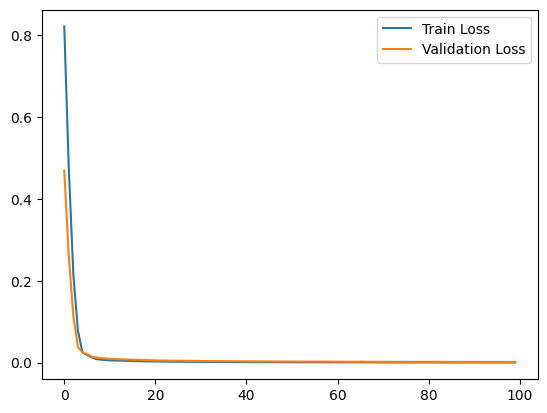

In [233]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

** Visualize training history**

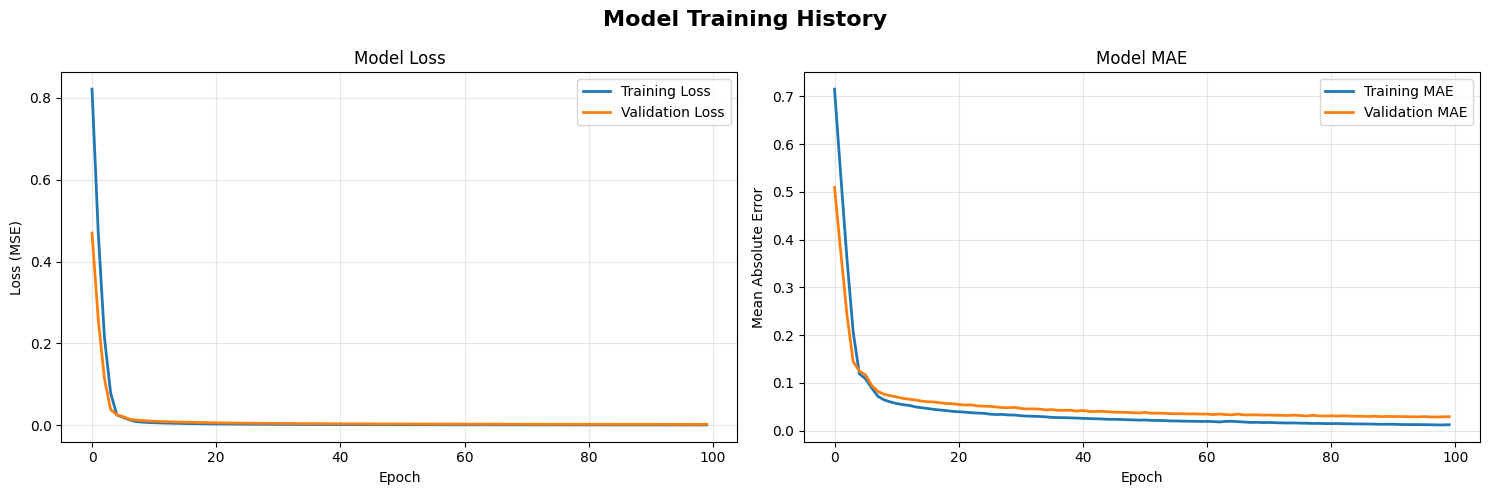


Final Metrics:
  Training Loss: 0.000241
  Validation Loss: 0.001640
  Training MAE: 0.012493
  Validation MAE: 0.029350


In [234]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model Training History', fontsize=16, fontweight='bold')

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('Model MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Metrics:")
print(f"  Training Loss: {history.history['loss'][-1]:.6f}")
print(f"  Validation Loss: {history.history['val_loss'][-1]:.6f}")
print(f"  Training MAE: {history.history['mae'][-1]:.6f}")
print(f"  Validation MAE: {history.history['val_mae'][-1]:.6f}")

**Make Prediction on test data**

In [235]:
# Make predictions on test set
print("Making predictions on test data...\n")

y_pred_scaled = model.predict(X_test, verbose=0)

# Inverse transform to get actual prices
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("✓ Predictions completed!")
print(f"  Predictions shape: {y_pred.shape}")

Making predictions on test data...

✓ Predictions completed!
  Predictions shape: (100, 1)


In [236]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()   # convert to 1D array


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


**Comparing Actual against Predicted number**

In [237]:
comparison = pd.DataFrame({
    "Actual": y_test.flatten(), # Flatten y_test to make it 1-dimensional
    "Predicted": y_pred.flatten() # Flatten y_pred to make it 1-dimensional
})

comparison.head()

,Actual,Predicted
0,0.197167,0.188299
1,0.102685,0.136789
2,1.765560,1.772605
3,-1.117338,-1.115487
4,1.523929,1.498272
